<a href="https://colab.research.google.com/github/agungnawawi10/Health-Lifestyle/blob/main/Health_Lifestyle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'numpy'

In [ ]:
health_lifestyle = pd.read_csv('health_lifestyle_dataset.csv')
health_lifestyle

,id,age,gender,bmi,daily_steps,sleep_hours,water_intake_l,calories_consumed,smoker,alcohol,resting_hr,systolic_bp,diastolic_bp,cholesterol,family_history,disease_risk
0,1,56,Male,20.5,4198,3.9,3.4,1602,0,0,97,161,111,240,0,0
1,2,69,Female,33.3,14359,9.0,4.7,2346,0,1,68,116,65,207,0,0
2,3,46,Male,31.6,1817,6.6,4.2,1643,0,1,90,123,99,296,0,0
3,4,32,Female,38.2,15772,3.6,2.0,2460,0,0,71,165,95,175,0,0
4,5,60,Female,33.6,6037,3.8,4.0,3756,0,1,98,139,61,294,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99996,53,Male,33.1,4726,3.9,2.0,3118,0,1,56,105,76,282,0,0
99996,99997,22,Male,35.1,11554,4.5,3.1,1967,0,0,51,149,77,192,0,0
99997,99998,37,Male,18.9,3924,3.8,1.0,2328,0,0,69,92,117,218,0,0
99998,99999,72,Female,27.8,16110,5.6,0.8,3093,0,0,93,164,72,188,0,0


In [ ]:
health_lifestyle.shape

(100000, 16)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

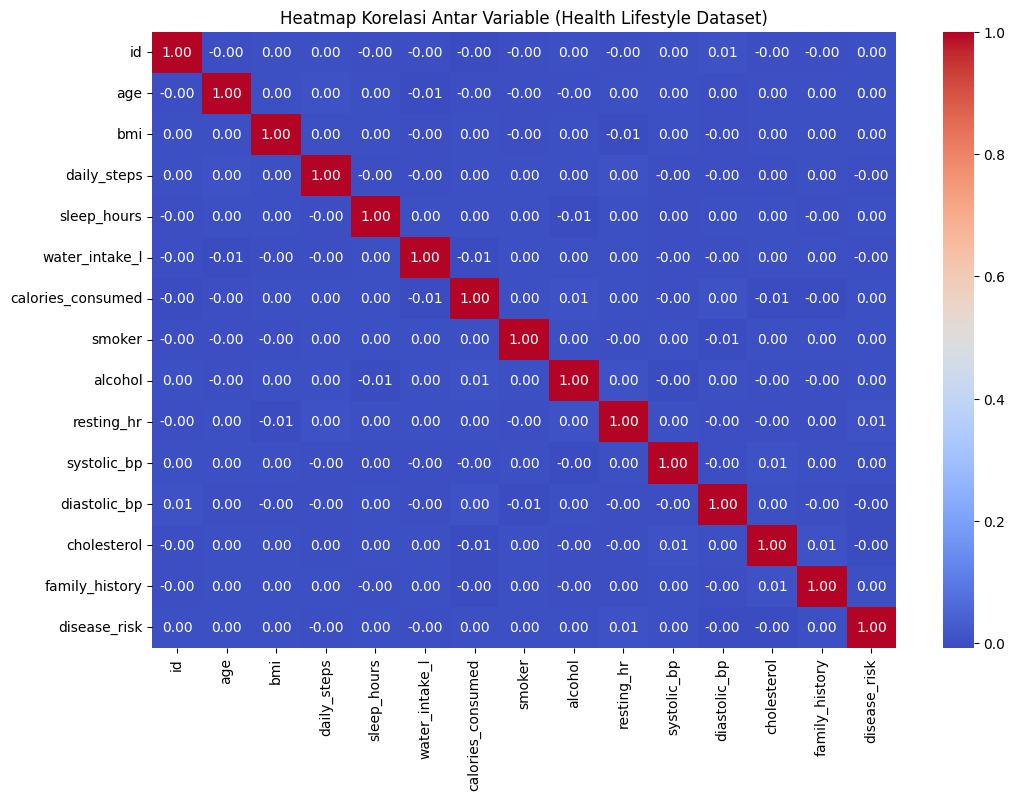

In [ ]:
corr = health_lifestyle.corr(numeric_only=True)

# visualisasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap Korelasi Antar Variable (Health Lifestyle Dataset)")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Dataset
x = health_lifestyle[['bmi', 'daily_steps', 'sleep_hours', 'cholesterol', 'systolic_bp', 'diastolic_bp']]
y = health_lifestyle['disease_risk']

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(x_train, y_train)

# Evaluasi
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

# Feature importance
print("Feature Importance:")
importances = pd.Series(model.feature_importances_, index=x.columns)
print(importances.sort_values(ascending=False))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     15042
           1       0.25      0.00      0.01      4958

    accuracy                           0.75     20000
   macro avg       0.50      0.50      0.43     20000
weighted avg       0.63      0.75      0.65     20000

Feature Importance:
daily_steps     0.209230
bmi             0.178500
cholesterol     0.169028
systolic_bp     0.152806
sleep_hours     0.149134
diastolic_bp    0.141303
dtype: float64


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# Dataset
x = health_lifestyle[['bmi', 'daily_steps', 'sleep_hours', 'cholesterol', 'systolic_bp', 'diastolic_bp']]
y = health_lifestyle['disease_risk']

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Model logistic regression dengan class_weight seimbang
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

# Prediksi & evaluasi
y_pred = log_reg.predict(x_test)
print("=== Logistic Regression (Balanced) ===")
print(classification_report(y_test, y_pred))

=== Logistic Regression (Balanced) ===
              precision    recall  f1-score   support

           0       0.75      0.50      0.60     15042
           1       0.25      0.49      0.33      4958

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.62      0.50      0.53     20000



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    scale_pos_weight=len(y_train[y_train == 0 ]) / len(y_train[y_train == 1]),
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(x_train, y_train)
y_pred = xgb_model.predict(x_test)

print("=== XGBoost ===")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [09:09:55] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
              precision    recall  f1-score   support

           0       0.75      0.59      0.66     15042
           1       0.25      0.41      0.31      4958

    accuracy                           0.54     20000
   macro avg       0.50      0.50      0.48     20000
weighted avg       0.63      0.54      0.57     20000



pengaruh semua fitur


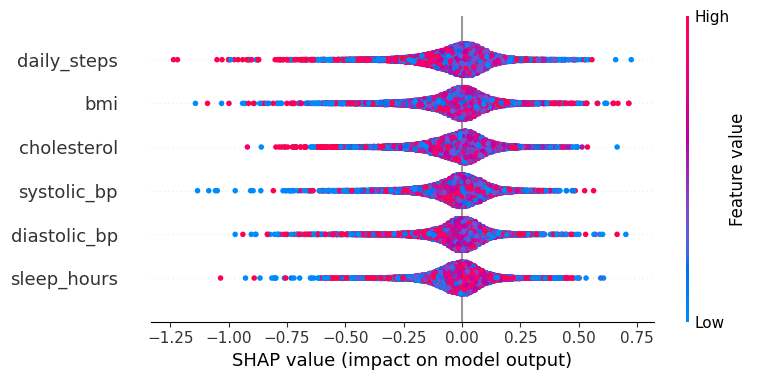

rata rata pengaruh fitur


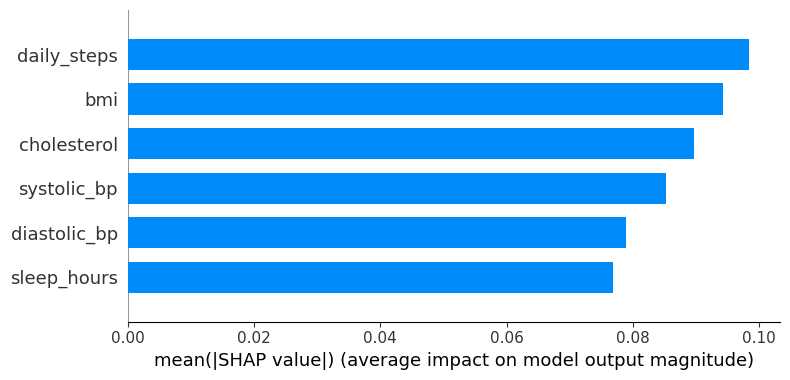

In [ ]:
import shap
import matplotlib.pyplot as plt

#explainer dari model XGBoost
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_test)

# pengaruh semua fitur
print("pengaruh semua fitur")
shap.summary_plot(shap_values, x_test, plot_type="dot")

# rata-rata pengaruh fitur
print("rata rata pengaruh fitur")
shap.summary_plot(shap_values, x_test, plot_type="bar")



Data sample:
       bmi  daily_steps  sleep_hours  cholesterol  systolic_bp  diastolic_bp
2362  30.7        13662          8.3          251           99           106


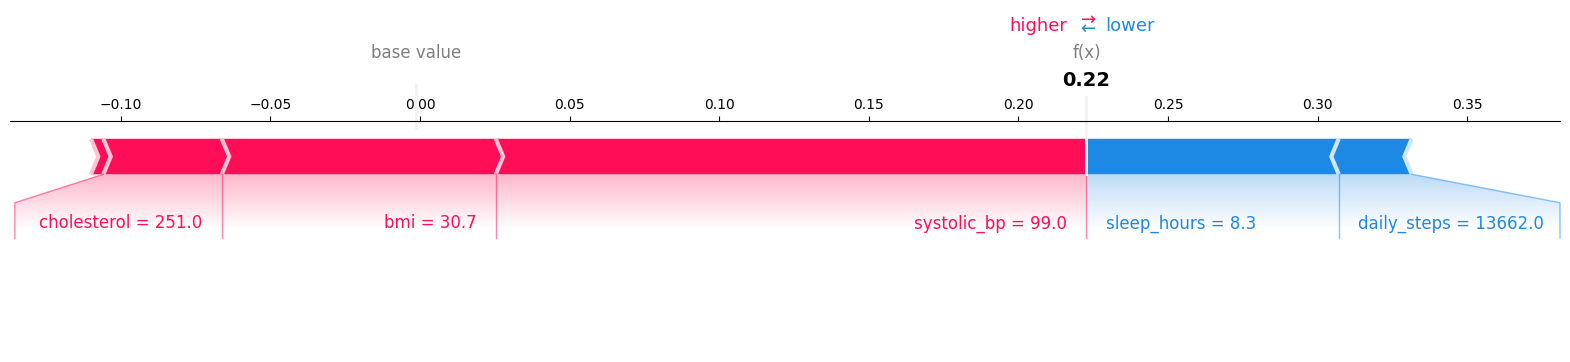

In [ ]:


# Ambil 1 sample dari data test
index = 5
data_sample = x_test.iloc[index:index+1]

# Tampilkan nilai fitur orang tersebut
print("Data sample:")
print(data_sample)

# Buat force plot
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[index],
    data_sample,
    matplotlib=True
)
